In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.cluster.vq as vq

In [3]:
matX = np.loadtxt('q3dm1-path2.csv', delimiter=',')

# TASK 18.1

In [28]:
m, n = matX.shape
v = []
for i in range(1, m):
    v.append(list(matX[i] - matX[i-1]))

v = np.array(v)

# TASK 18.2

In [5]:
def k_means(W, k, tmax=100):
    
    r, c = W.shape
    m = np.random.choice([i for i in range(r)], k, replace=False)
    means = []
    for i in m:
        means.append(list(W[i]))

    cluster = {}

    for i in range(tmax):
        for j in range(k):
            cluster[j] = []

        for j in range(r):
            cluster[np.argmin([np.sqrt(np.sum((W[j] - m) ** 2)) for m in means])].append(j)

        for j in range(k):
            if len(cluster[j]):
                means[j] = np.sum(np.array([list(W[p]) for p in cluster[j]]), axis=0)/len(cluster[j])
            else:
                means[j] = np.zeros(k)

    return [cluster, means]

In [6]:
num_cluster = 9
cluster, means = k_means(W=v, k=num_cluster)

In [7]:
means, indy = vq.kmeans2(v, k = 9, iter = 100, minit = '++')

# TASK 18.3

In [8]:
clusterSOM = nx.read_gpickle('som.gpickle')

In [9]:
s = []
a = [0]
    
for i in range(len(matX)):
    s.append(np.argmin([np.sum((matX[i] - clusterSOM.nodes[s_]['w']) ** 2) for s_ in clusterSOM.nodes]))

for i in range(len(v)):
    a.append(np.argmin([np.sum((v[i] - means[j]) ** 2) for j in range(num_cluster)]))

In [185]:
nodes = len(clusterSOM.nodes)
p = np.zeros((num_cluster, nodes))

t = len(matX)

for k in range(1, t):
    p[a[k], s[k]] += 1
        
p = np.round(np.divide(p, np.sum(p, axis=0)), 2)
p

array([[0.01, 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.29, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.46, 0.36, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.08, 0.66, 0.15, 0.02, 0.04, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.71, 0.46, 0.02, 0.  , 0.01,
        0.17, 0.09, 0.36, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.42, 0.54, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.16, 0.59, 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.35, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.47, 0.25, 0.09],
       [0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.18, 0.34, 0.12,
        0.38, 0.46, 0.09, 0.  , 0.  , 0.  , 0.  , 0.05, 0.15],
       [0.92, 1.  , 0.65, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.6 ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.4 , 0.37, 0.73],
       [0.03, 0.  , 0.  , 0.  , 0.  , 0. 

In [128]:
def roulette_selection(p):

    x = np.where(p>0)[0]
    fitness = [0] * len(p)
    fitness[x[0]] = p[x[0]]
    for i in range(1, len(x)):
        fitness[x[i]] = p[x[i]] + fitness[x[i-1]]
    f = np.random.random()
    for j in range(len(fitness)):
        if f < fitness[j]:
            return j
        
    return np.argmax(p)

In [179]:
r, c = matX.shape

def bayseian(num_cluster, clusterSOM, means, eta= 0.2, tmax=1000):
    X = np.zeros((tmax, c))
    n = len(clusterSOM.nodes)
    for i in range(1, tmax):
        state = np.argmin([np.sum((X[i-1] - clusterSOM.nodes[s_]['w']) ** 2) for s_ in clusterSOM.nodes])
    
        action = roulette_selection(p[:,state])

        velocity1 = means[action]
        velocity2 = clusterSOM.nodes[(state+1)%n]['w'] - X[i-1]
        X[i] = X[i-1] + eta * velocity1 + (1 - eta) * velocity2
#         X[i] = velocity1 + X[i-1]
    
    return X[10:]

In [180]:
points = bayseian(num_cluster=9, clusterSOM=clusterSOM, means=means, tmax=10000)

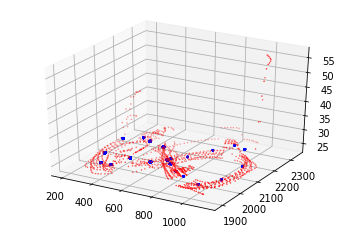

In [181]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1_axis = matX.T[0, :]
y1_axis = matX.T[1, :]
z1_axis = matX.T[2, :]
ax.scatter3D(x1_axis, y1_axis, z1_axis, c = 'r', s=0.2);
ax.scatter3D(points[:,0], points[:,1], points[:,2], c = 'b', s=2);

In [183]:
np.sum(p, axis=0)

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.01, 1.  , 1.  ,
       1.01, 0.99, 1.  , 1.  , 1.  , 1.01, 1.01, 1.  , 1.  ])